In [20]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tensorflow
from sklearn.preprocessing import MinMaxScaler
import pandas as pandas
import keras
from keras.layers import Dense, Dropout, LSTM


def RNN(data):
  minmax = MinMaxScaler()
  first = []
  second = []

  pandas.read_csv(data).plot('time')
  days = np.array([pandas.read_csv(data)['value'].to_numpy()]).T
  
  plt.xlabel('Date')
  plt.ylabel('Value')

  minmax.fit(days)
  days = np.squeeze(minmax.transform(days))
  siz = days.shape[0]
  for i in range(siz-20):
    second.append(days[i+20]) 	
    first.append(days[i:i+20])

  first = np.array(first)
  second = np.array(second)
  first = np.reshape(first, (first.shape[0], 1, first.shape[1]))

  return first, second

x_train, y_train = RNN('train.csv')

loss in training: 0.0026734231505542994
*********Train loss*********


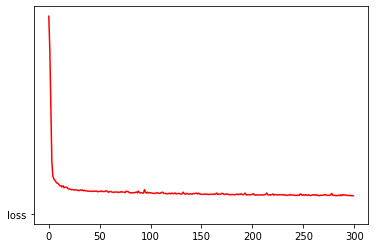

In [31]:
m = keras.Sequential([LSTM(units=20, activation='tanh', input_shape=(1,20), return_sequences=True),LSTM(units=20, activation='tanh'),
                             Dense(20, activation='tanh'),Dense(1, activation='sigmoid')])
m.compile(optimizer='adam', loss='mean_squared_error')
history = m.fit(x_train, y_train, epochs=300, verbose=0)
print("loss in training:", m.evaluate(x_train, y_train, verbose=0))
print("*********Train loss*********")
plt.plot(history.epoch, history.history['loss'], 'r', 'loss')




loss in test: 0.005755553022027016


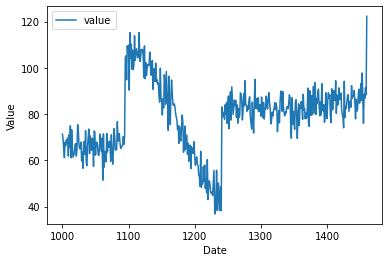

In [40]:
x_test, y_test = RNN('test.csv')
print("loss in test:", m.evaluate(x_test, y_test, verbose=0))

In [41]:
predict_train = np.squeeze(m.predict(x_train))
plt.plot(y_train, 'b' , label='training value')

plt.plot(predict_train, 'r', label='training prediction')
plt.xlabel('Day')
plt.ylabel('Value')
plt.legend()
plt.show()

predict_test = np.squeeze(m.predict(x_test))
plt.plot(y_test, 'b', label='test value')
plt.plot(predict_test, 'r' , label='test prediction')
plt.xlabel('Day')
plt.ylabel('Value')
plt.legend()
plt.show()